In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler

import geomstats.backend as gs
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA
from geomstats.geometry.functions import HilbertSphere

INFO: Using numpy backend


In [3]:
data = pd.read_excel("Itr_6.xlsx")
lambda_= data.iloc[:,0].array
Data = data.iloc[:,1:97].T
Data_normalized = pd.DataFrame()
for i in range(len(Data.columns)):
    spectra_normalized = Data.iloc[i:i+1,:]/np.linalg.norm(Data.iloc[i:i+1,:])
    Data_normalized = Data_normalized.append(spectra_normalized)
S = np.array(Data_normalized)


In [4]:
# define the Hilbert Sphere manifold and project function on to this manifold
manifold = HilbertSphere(lambda_)
sinf_data = gs.array([manifold.projection(si) for si in S]).squeeze()
print('Projection data shape : ', sinf_data.shape)

Projection data shape :  (96, 101)


INFO: n_iter: 32, final variance: 0.007414192732940497, final dist: [0.00260491], final_step_size: 1e-06


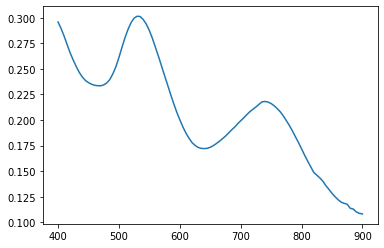

In [5]:
# compute the mean value
mean = FrechetMean(metric=manifold.metric, 
                   method="adaptive", 
                   max_iter=32, 
                   verbose=True)
mean.fit(S)
mean_estimate = mean.estimate_
fig, ax = plt.subplots()
ax.plot(lambda_, mean_estimate.flatten())
plt.show()

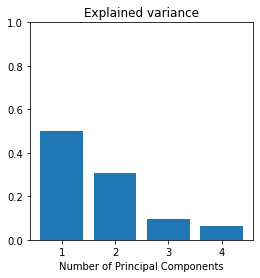

In [6]:
# perform tangent pca
N_COMPONENTS = 4
tpca = TangentPCA(metric=manifold.metric, n_components=N_COMPONENTS)
tpca.fit(sinf_data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(sinf_data)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
xticks = gs.arange(1, tpca.components_.shape[0] + 1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title("Explained variance")
ax.set_xlabel("Number of Principal Components")
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)
plt.show()

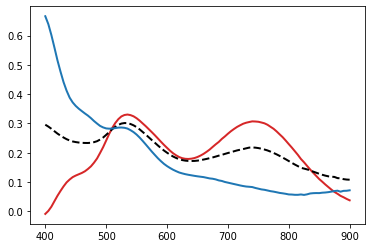

In [7]:
#PC1
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([-1,0,0,0])).reshape((101,))
y2 = mean_estimate.reshape((101,))
y3 = tpca.inverse_transform(np.array([1,0,0,0])).reshape((101,))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

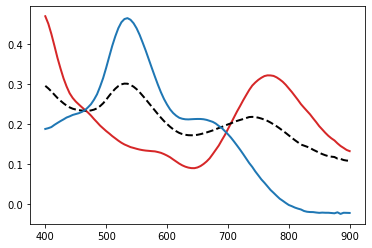

In [8]:
#PC2
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([0,-1,0,0])).reshape((101,))
y2 = mean_estimate.reshape((101,))
y3 = tpca.inverse_transform(np.array([0,1,0,0])).reshape((101,))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

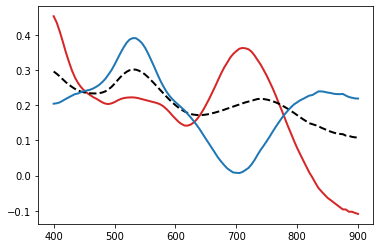

In [9]:
#PC3
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([0,0,-1,0])).reshape((101,))
y2 = mean_estimate.reshape((101,))
y3 = tpca.inverse_transform(np.array([0,0,1,0])).reshape((101,))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()

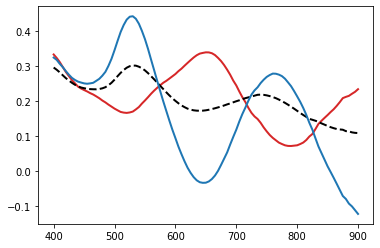

In [10]:
#PC4
x = data.iloc[:,0]
y1 = tpca.inverse_transform(np.array([0,0,0,-1])).reshape((101,))
y2 = mean_estimate.reshape((101,))
y3 = tpca.inverse_transform(np.array([0,0,0,1])).reshape((101,))

plt.plot(x, y1, color='tab:red', lw=2.0) # mean - std 
plt.plot(x, y2, color='k', ls='--', lw=2.0) # mean
plt.plot(x, y3, color='tab:blue', lw=2.0) # mean + std
plt.show()
